### 1.1 : Installing and Importing Dependencies 

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Removing corrupt or misread files

In [3]:
data_dir = 'mood data'

In [4]:
image_ext = ['png', 'jpg', 'jpeg', 'bmp']
image_ext

['png', 'jpg', 'jpeg', 'bmp']

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [7]:
cnt = 0
for img_class in os.listdir(data_dir):
    for imgs in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, imgs)
        try:
            img = cv2.imread(img_path);
            ext= imghdr.what(img_path);
            if ext not in image_ext:
                print('extension : {}, Image not in required format - {}'.format(ext, img_path));
                cnt += 1
                # os.remove(img_path);
        except Exception as e:
            print("Issue with image - {}".format(img_path));
            # os.remove(img_path)
print(cnt)

0


##### Visualizing Data to ensure consistency

In [8]:
eg = cv2.imread(os.path.join(data_dir, 'happy', '1-2.jpg'))

In [9]:
eg.shape

(350, 590, 3)

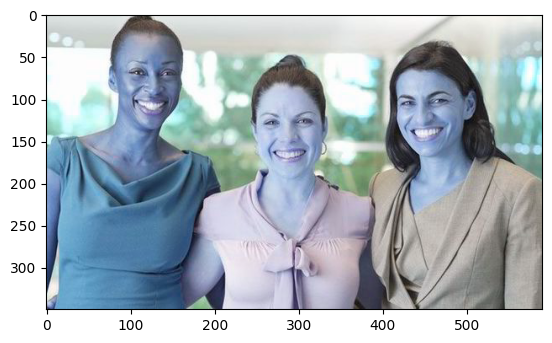

In [10]:
plt.imshow(eg)

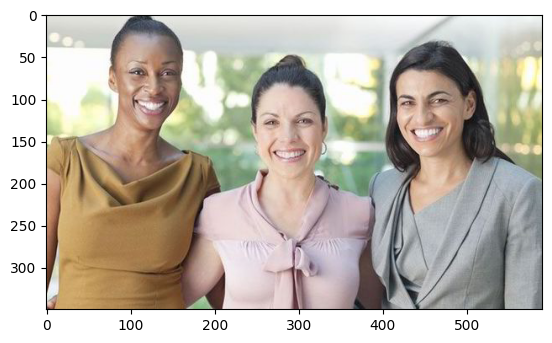

In [11]:
plt.imshow(cv2.cvtColor(eg, cv2.COLOR_BGR2RGB))

### 1.3 Loading Data

We will be using the Keras inbuilt utility to create labels and classes for images. Further, it will also perform some preliminary preprocessing on the images, such as resizing.

In [12]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [48]:
#Building a data pipeline
data = tf.keras.utils.image_dataset_from_directory('mood data')

Found 302 files belonging to 2 classes.


In [49]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
#Iterator for data pipeline as it can't be accessed directly
data_itr = data.as_numpy_iterator()

In [51]:
#Retrieving data in batches
batch = data_itr.next()

In [52]:
#Creates a batch of 32 images
batch[0].shape

(32, 256, 256, 3)

In [53]:
#The second column is target labels
batch[1]

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

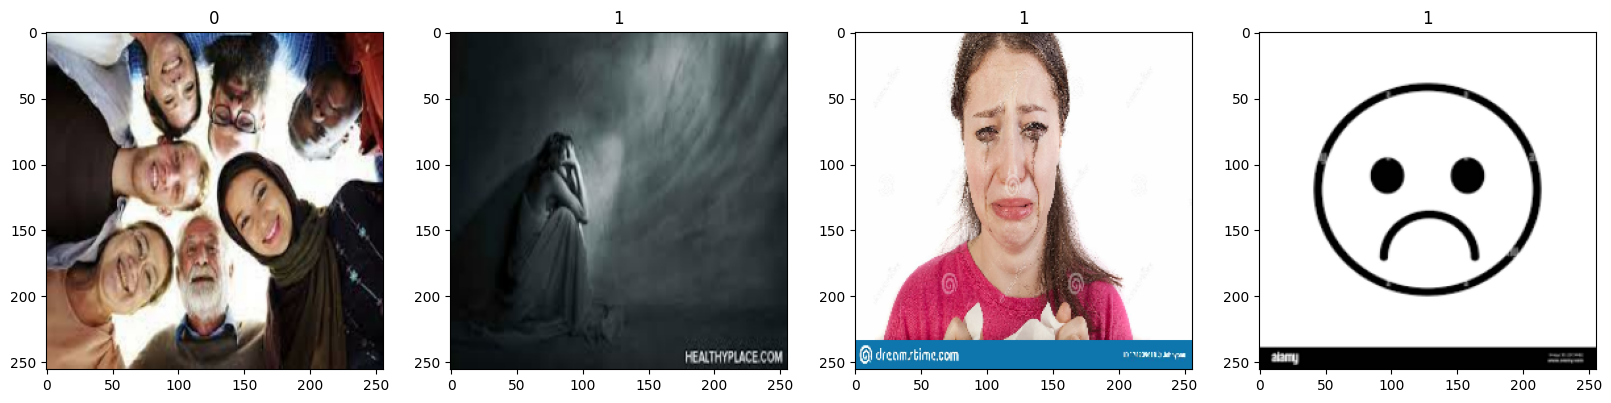

In [56]:
#Checking target label values
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

|      Class      | Target Label |
|----|----|
|    Happy    |      0       |
|     Sad     |      1       |

### 2 Preprocessing Data

##### 2.1 Scaling data

In [57]:
data = data.map(lambda x, y : (x/255, y));

In [58]:
data.as_numpy_iterator().next()

(array([[[[0.5921569 , 0.6509804 , 0.2784314 ],
          [0.5793505 , 0.638511  , 0.26798406],
          [0.5211397 , 0.5818321 , 0.22049633],
          ...,
          [0.165625  , 0.07337622, 0.02257966],
          [0.18094362, 0.08716299, 0.03943015],
          [0.18431373, 0.09019608, 0.04313726]],
 
         [[0.57901347, 0.637163  , 0.266299  ],
          [0.5676842 , 0.6261707 , 0.25724187],
          [0.51618725, 0.5762056 , 0.21607307],
          ...,
          [0.1801059 , 0.08771231, 0.03489368],
          [0.18963216, 0.09610165, 0.04634675],
          [0.19172794, 0.09794731, 0.04886642]],
 
         [[0.51927084, 0.5743566 , 0.21115196],
          [0.51465535, 0.5700782 , 0.20841375],
          [0.49367604, 0.5506307 , 0.19596738],
          ...,
          [0.24592812, 0.15287632, 0.09086651],
          [0.2291255 , 0.13673191, 0.07778583],
          [0.22542892, 0.13318014, 0.07490809]],
 
         ...,
 
         [[0.11243872, 0.11636029, 0.12420343],
          [0.11550

##### 2.2 Split Data

In [59]:
len(data)

10

In [60]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
print("Training size:", train_size)
print("Validation size:",  val_size)
print("Testing size:", test_size)

Training size: 7
Validation size: 2
Testing size: 1


In [61]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 3. Deep Learning Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
import keras_tuner
import keras
from tensorflow.keras.optimizers import Adam

In [63]:
def model_building(lr):
    opt = Adam(learning_rate = lr)
    model = Sequential()
    #Add a convolutional or Pooling layer
    model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    #Relu: Negative to Zero, Positive preserved

    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())

    model.add(Conv2D(16, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=opt, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    
    model.summary()
    return model

In [64]:
model = model_building(0.001)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

#### 4. Train the Model

In [65]:
logdir='logs'

In [66]:
# Logs will be found in the 'logs' directory
tb_callback =  tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
# Learning rate = 0.001
model_run = model.fit(train, epochs=20, validation_data=val, callbacks=[tb_callback])

Epoch 1/20


7/7 [==============================] - 10s 846ms/step - loss: 0.7214 - accuracy: 0.5223 - val_loss: 0.6055 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 6s 756ms/step - loss: 0.6006 - accuracy: 0.6875 - val_loss: 0.5245 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 7s 782ms/step - loss: 0.5099 - accuracy: 0.7812 - val_loss: 0.3824 - val_accuracy: 0.9219
Epoch 4/20
7/7 [==============================] - 7s 777ms/step - loss: 0.4763 - accuracy: 0.7991 - val_loss: 0.3869 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 7s 777ms/step - loss: 0.3405 - accuracy: 0.9062 - val_loss: 0.2566 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 7s 769ms/step - loss: 0.2323 - accuracy: 0.8973 - val_loss: 0.1564 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 7s 765ms/step - loss: 0.2112 - accuracy: 0.9330 - val_loss: 0.2426 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==============

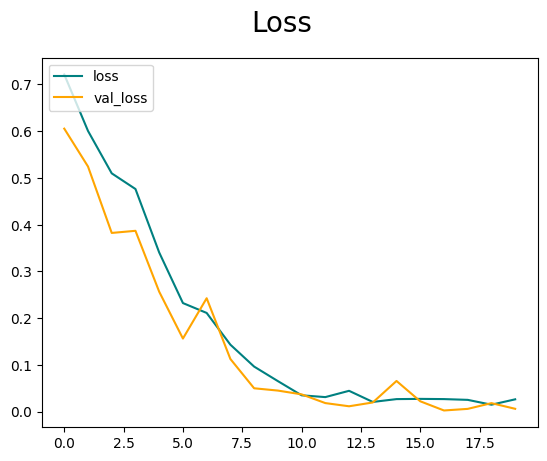

In [68]:
fig = plt.figure()
plt.plot(model_run.history['loss'], color='teal', label='loss')
plt.plot(model_run.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

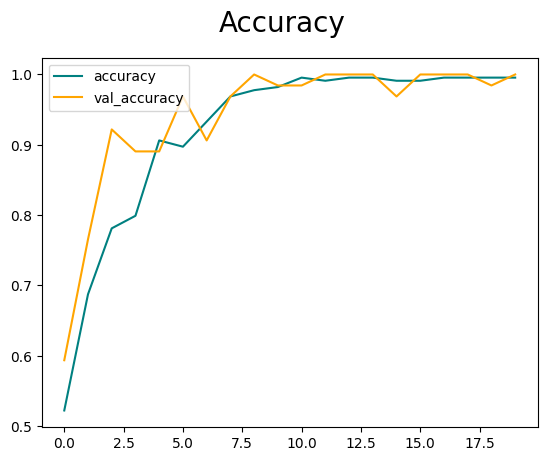

In [69]:
fig = plt.figure()
plt.plot(model_run.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_run.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 5. Evaluating Performance of Model

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [71]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [72]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 234ms/step


In [73]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### 6. Test the Model

In [74]:
import cv2

Example 1

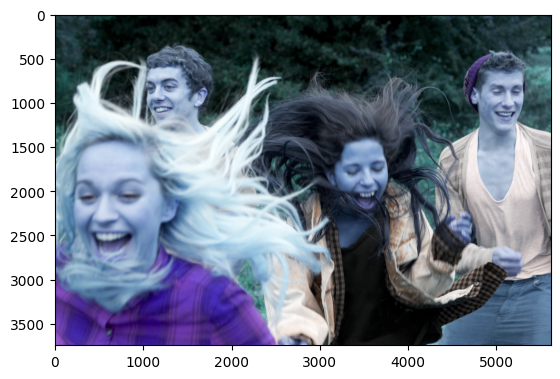

In [80]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

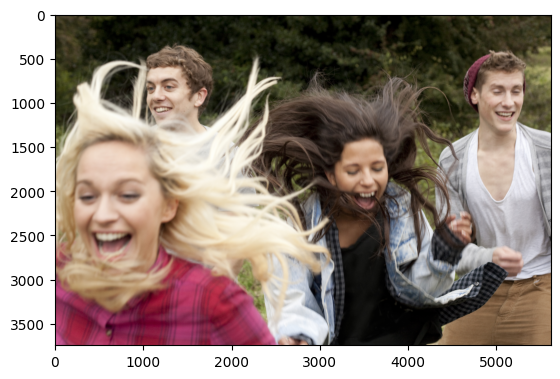

In [81]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

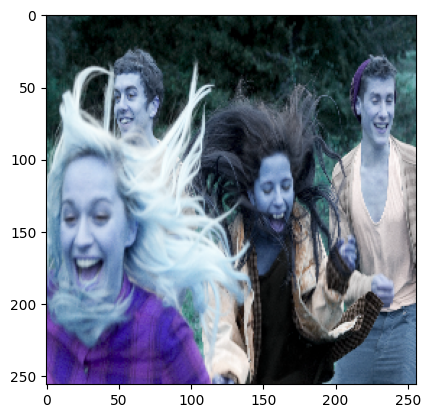

In [82]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [83]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 52ms/step


array([[0.00048316]], dtype=float32)

In [84]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Example 2

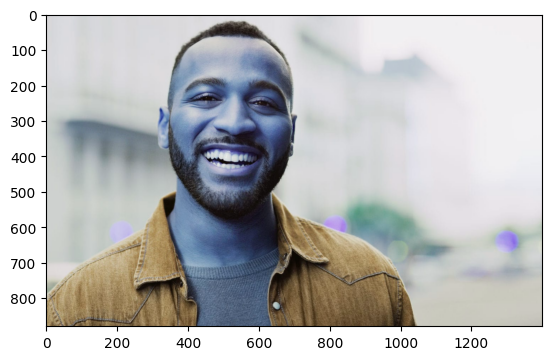

In [86]:
img = cv2.imread('Happy-Guy.jpg')
plt.imshow(img)
plt.show()

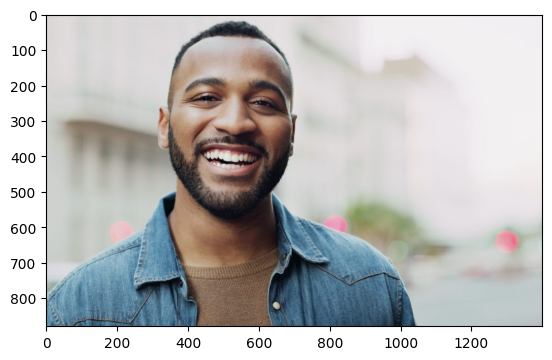

In [87]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

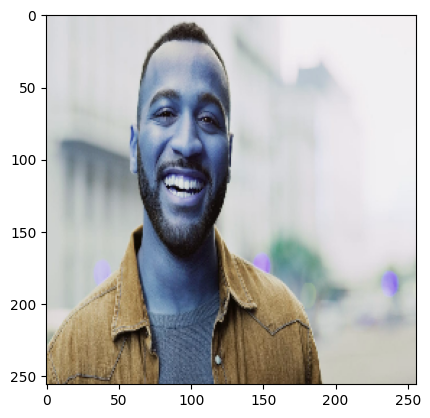

In [88]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 53ms/step


array([[0.19763045]], dtype=float32)

In [90]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Example 3

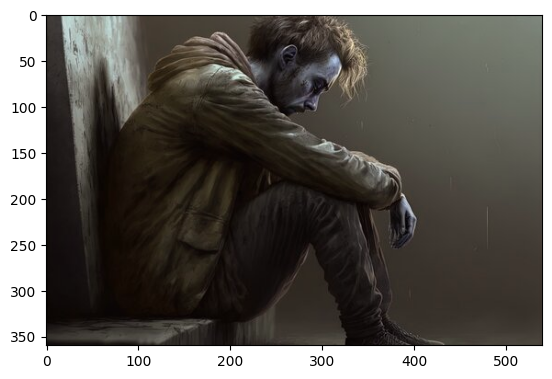

In [100]:
img = cv2.imread('sad-guy.jpg')
plt.imshow(img)
plt.show()

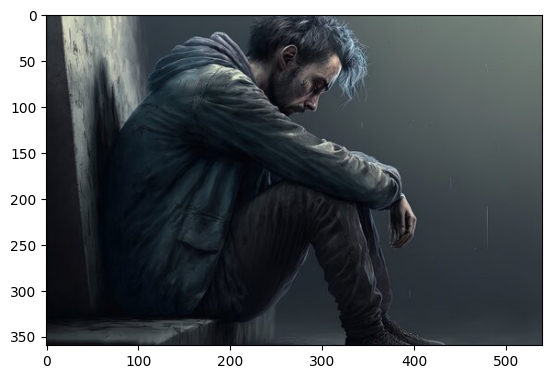

In [104]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

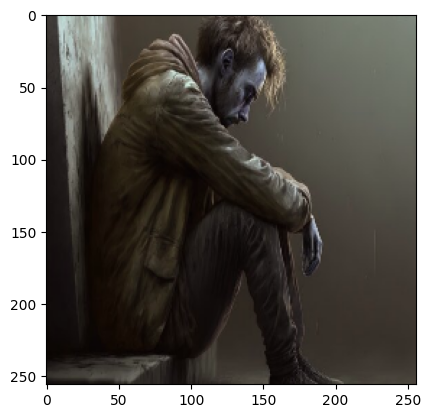

In [105]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [106]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 55ms/step


array([[0.99971944]], dtype=float32)

In [107]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Example 4

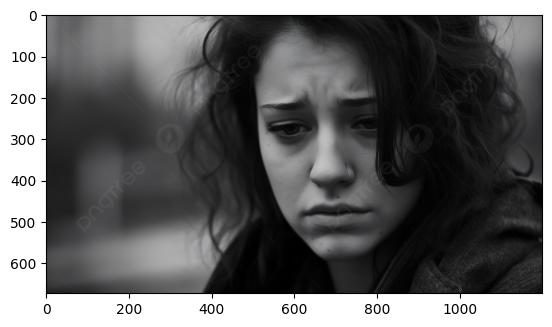

In [109]:
img = cv2.imread('sad-girl.jpg')
plt.imshow(img)
plt.show()

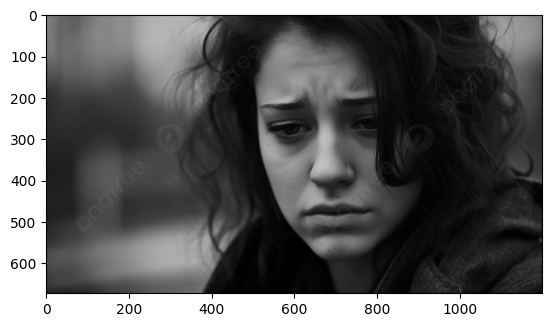

In [110]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

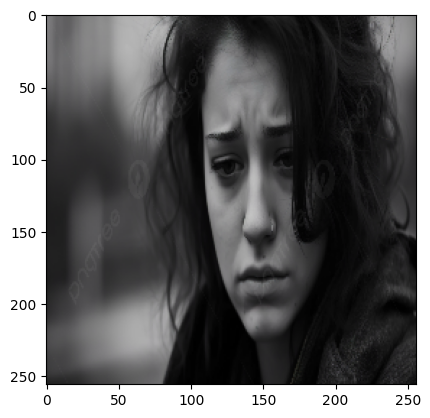

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 49ms/step


array([[0.62439114]], dtype=float32)

In [113]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### 7. Save the Model

In [114]:
from tensorflow.keras.models import load_model

In [115]:
model.save(os.path.join('models','imageclassifier.h5'))

In [117]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [118]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 150ms/step


array([[0.62439114]], dtype=float32)